In [1]:
import numpy as np
import pandas as pd
#import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
#import statsmodels.api as sm
from sklearn.metrics import r2_score

import seaborn as sn

In [2]:
from matplotlib import rcParams
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("datset_phones.csv")

In [4]:
df.head()

,Year,Model,Price,buy
0,2010,1.1,120,no
1,2011,1.2,150,no
2,2011,1.8,160,no
3,2012,2.0,145,no
4,2012,2.1,150,no


In [22]:
df.isnull().sum()

Year     0
Model    0
Price    0
buy      0
dtype: int64

In [6]:
X=df[["Year","Model"]]
Y=df["Price"]

In [26]:
print(np.square(X).head(), X.head())

      Year  Price
0  4040100  14400
1  4044121  22500
2  4044121  25600
3  4048144  21025
4  4048144  22500    Year  Price
0  2010    120
1  2011    150
2  2011    160
3  2012    145
4  2012    150


In [8]:
print(Y)

0     120
1     150
2     160
3     145
4     150
5     160
6     190
7     210
8     220
9     200
10    210
11    215
12    220
13    260
14    270
15    280
16    250
17    264
18    270
19    282
20    295
21    303
22    312
23    323
24    337
25    300
26    315
27    340
28    360
29    399
Name: Price, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_15164\2408155568.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


<AxesSubplot: >

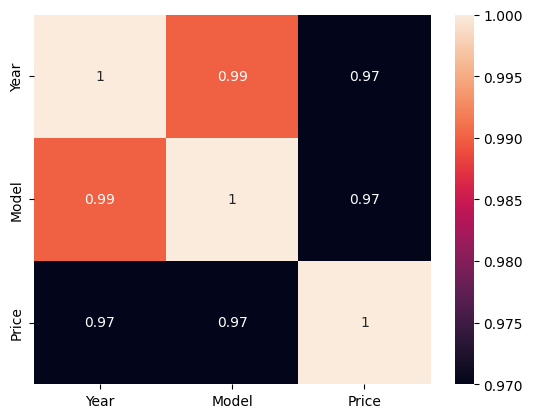

In [9]:
correlation_matrix = df.corr().round(2)
sn.heatmap(data=correlation_matrix, annot=True)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.30, random_state=30)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

print(Y_train)

(21, 2)
(9, 2)
(21,)
(9,)
4     150
11    215
22    312
18    270
19    282
1     150
16    250
7     210
9     200
3     145
14    270
17    264
21    303
2     160
23    323
12    220
20    295
27    340
13    260
29    399
5     160
Name: Price, dtype: int64


In [11]:
# Taking Price = b0 + b1(Year) + b2(Model)
def linReg(X1,X2,Y):
    N=len(Y)

    X1_square=X1**2
    sig_x1_2= X1_square.sum() - (X1.sum()**2/N)
    X2_square=X2**2 
    sig_x2_2= X2_square.sum() - (X2.sum()**2/N)
    X1_X2=X1*X2
    sig_x1x2= X1_X2.sum() - (X1.sum()*X2.sum()/N)
    X1_Y=X1*Y
    sig_x1y= X1_Y.sum() - (X1.sum()*Y.sum()/N)
    X2_Y=  X2*Y
    sig_x2y= X2_Y.sum() - (X2.sum()*Y.sum()/N)

    b1_num=((sig_x2_2)*(sig_x1y)-(sig_x1x2)*(sig_x2y))
    b2_num=((sig_x1_2)*(sig_x2y)-(sig_x1x2)*(sig_x1y))
    denom= ((sig_x1_2)*(sig_x2_2)-(sig_x1x2)**2)
    b1=b1_num/denom
    b2=b2_num/denom
    b0=Y.mean()-b1*X1.mean()-b2*X2.mean()
    return b0, b1, b2

In [29]:
np.square(X).sum()

Year     122012801
Price      2030172
dtype: int64

In [12]:
b0,b1,b2=(linReg(X["Year"],X["Model"],Y))

In [13]:
X1=X["Year"]
X2=X["Model"]

In [14]:
print(b0,b1,b2)

-22907.63348685766 11.44668731129901 20.032514184125056


In [15]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

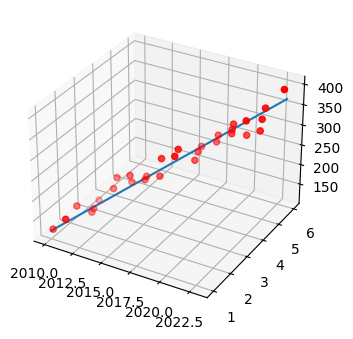

In [16]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

x=np.array([2010,2023])
y=np.array([1,6])
z=np.array([120.24,369.21])
ax.scatter(X["Year"],X["Model"],Y, c='r')
ax.plot3D(x,y,z)
plt.show()

In [17]:
print(b0+b1*2010+b2*1)
print(b0+b1*2023+b2*6)

120.24052303747627
369.2100290049883


In [18]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression

In [19]:
X=df[['Year','Price']]
clf = LogisticRegression(fit_intercept=True, solver='lbfgs')
clf.fit(X,df['buy'])
coef = clf.coef_[0]
intercept = clf.intercept_[0]

In [20]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
plt.scatter(x=df[df[buy=="yes"]["Year"]], y=df[df[buy=="yes"]["Price"]],color='b')
plt.scatter(x=df[df['buy'=="no"]]["Year"], y=df[df['buy'=="no"]]["Price"],color='r')
plt.show()

NameError: name 'buy' is not defined

In [ ]:
X=df[['Year','Price']]
Y=df['buy']
clf= LogisticRegression()
clf.fit(X,Y)
coef = clf.coef_[0]
intercept = clf.intercept_[0]
print(coef,intercept)

[-0.00248297  0.01712361] -1.7906123016963876e-06


In [ ]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

InvalidIndexError: (slice(None, None, None), 0)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


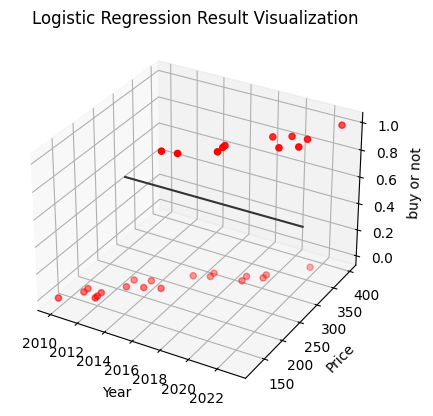

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1_min, x1_max = X['Year'].min(), X['Year'].max()
x2_min, x2_max = X['Price'].min(), X['Price'].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx1.shape)
ax.contour(xx1, xx2, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

ax.scatter(df['Year'], df['Price'], df['buy'].map({'yes':1,'no':0}), c='r', marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Price')
ax.set_zlabel('buy or not')
ax.set_title('Logistic Regression Result Visualization')
plt.show()

TypeError: Input z must be at least a (2, 2) shaped array, but has shape (30, 1)

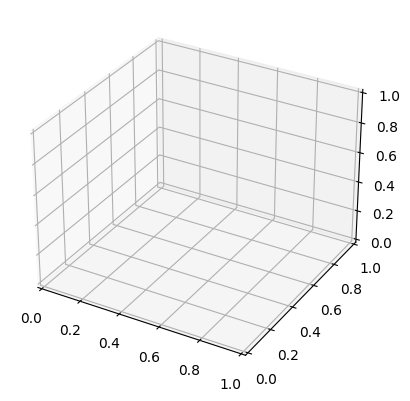

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1_min, x1_max = X['Year'].min(), X['Year'].max()
x2_min, x2_max = X['Price'].min(), X['Price'].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = clf.predict_proba(X)[:, 1].reshape(X['Year'].shape)
ax.contour(X['Year'],X['Price'], pd.DataFrame(probs), levels=[.5], cmap="Greys", vmin=0, vmax=.6)

ax.scatter(df['Year'], df['Price'], df['buy'].map({'yes':1,'no':0}), c='r', marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Price')
ax.set_zlabel('buy or not')
ax.set_title('Logistic Regression Result Visualization')
plt.show()